In [1]:
# import libaries
import pandas as pd 
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
from nltk.corpus import stopwords 
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from sklearn.mixture import GaussianMixture 

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv('Data/github_comments.tsv',delimiter='\t',encoding='utf-8', index_col=0)
print(data.head())

                                             comment         comment_date  \
0                                 @chef/maintainers   2017-05-29 10:54:23   
1  omnibus builds are already in pain so merging ...  2017-05-25 20:34:45   
2  @chef/client-core reviewage (lets not think to...  2017-05-25 17:21:56   
3  This blows up 14.04 because allow-downgrades i...  2017-05-25 19:15:14   
4  I know @lamont-granquist and @thommay  are goi...  2017-05-23 22:58:13   

   is_merged            merged_at  request_changes  
0        0.0                  NaN                0  
1        1.0  2017-05-25 20:34:27                0  
2        1.0  2017-05-25 19:05:10                0  
3        0.0                  NaN                1  
4        1.0  2017-05-24 04:40:42                0  


In [3]:
def print_comment(index):
    example= data[data.index == index][['comment','comment_date']].values[0]
    if len(example)> 0:
        print(example[0])
        print('comment date:', example[1])
print_comment(20)

makes me a bit twitchy.  should really be `allow(::File).to recieve(:read).and_call_original` (which is much clearer that the problem is that you're working around the stub on the next line blocking other arguments).

and it feels like it should a bit more explicitly test this.  setup the non-fips case and explicitly mock it out to run non-fips even on a fips box, and then mock it to fips and make sure the behavior is correct even on a non-fips box.
comment date: 2017-05-19 22:52:17


In [4]:
stopword= set(stopwords.words('english'))
new_words=['github','https','com']
stopword_= stopword.union(new_words)
stopword__= stopword_.union(STOPWORDS)

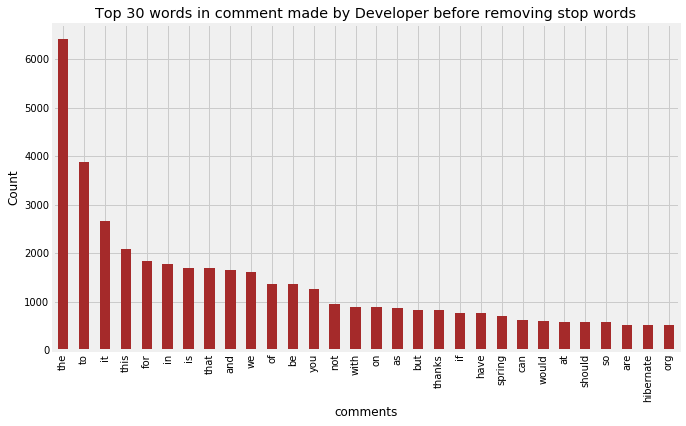

<Figure size 72x72 with 0 Axes>

In [5]:
# toke (vocabulary) frequency_ distrubution before removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer().fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

plt.figure(figsize = (10,6))
common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 words in comment made by Developer before removing stop words')
plt.figure(figsize = (1,1))
plt.show()


df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 words in comment made by Developer before removing stop words')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.



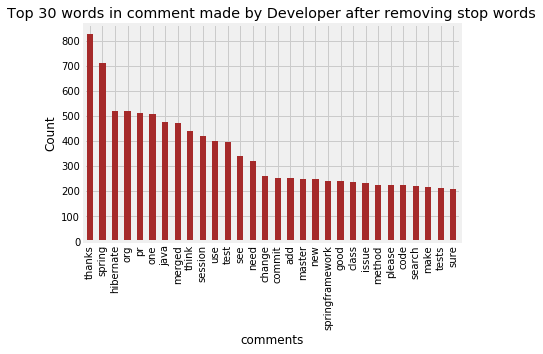

<Figure size 2160x432 with 0 Axes>

In [6]:
# toke (vocabulary) frequency_ distrubution after removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer(stop_words=stopword__).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 words in comment made by Developer after removing stop words')
plt.figure(figsize = (30,6))
plt.show()



df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 words in comment made by Developer after removing stop words')


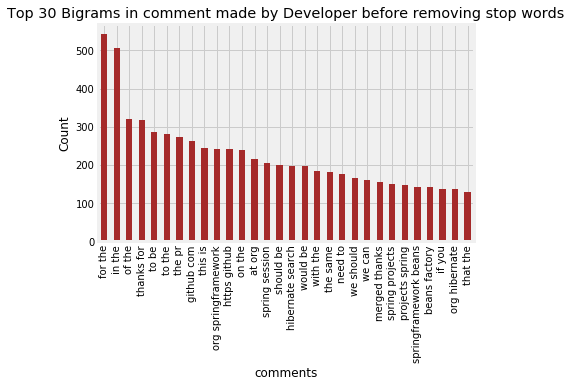

<Figure size 2160x432 with 0 Axes>

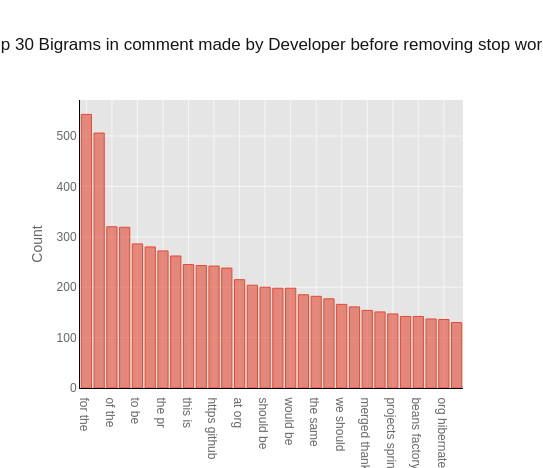

In [7]:
# Bigrams frequency distribution before removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 Bigrams in comment made by Developer before removing stop words')
plt.figure(figsize = (30,6))
plt.show()



df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 Bigrams in comment made by Developer before removing stop words')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.



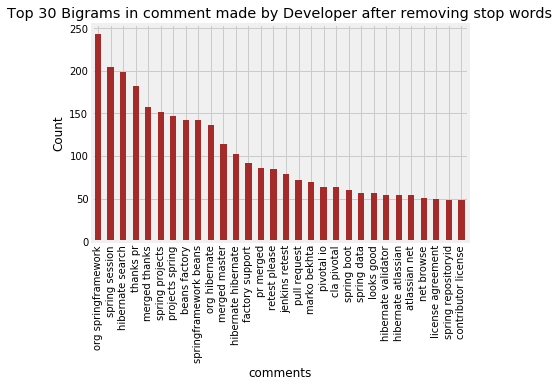

<Figure size 2160x432 with 0 Axes>

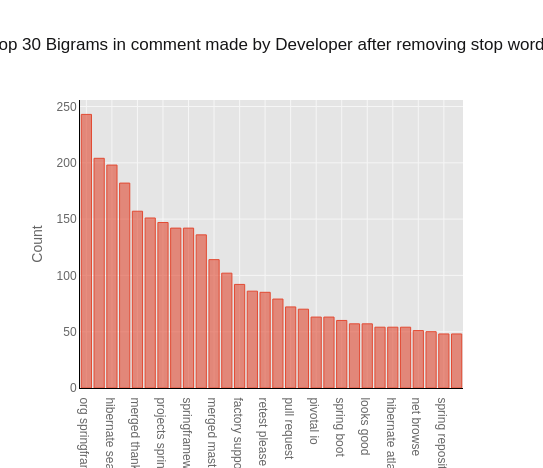

In [8]:
# Bigrams frequency distribution after removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer(ngram_range=(2,2),stop_words=stopword__).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 Bigrams in comment made by Developer after removing stop words')
plt.figure(figsize = (30,6))
plt.show()

df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 Bigrams in comment made by Developer after removing stop words')


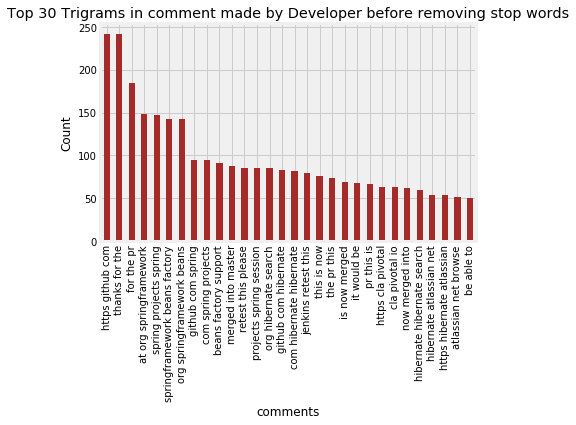

<Figure size 2160x432 with 0 Axes>

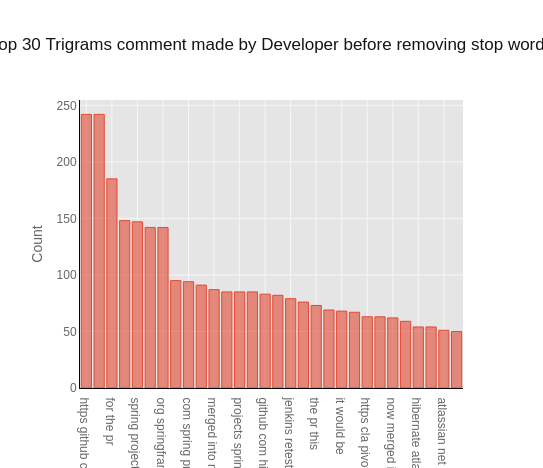

In [9]:
# Trigrams frequency distribution before removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 Trigrams in comment made by Developer before removing stop words')
plt.figure(figsize = (30,6))
plt.show()



df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 Trigrams comment made by Developer before removing stop words')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.



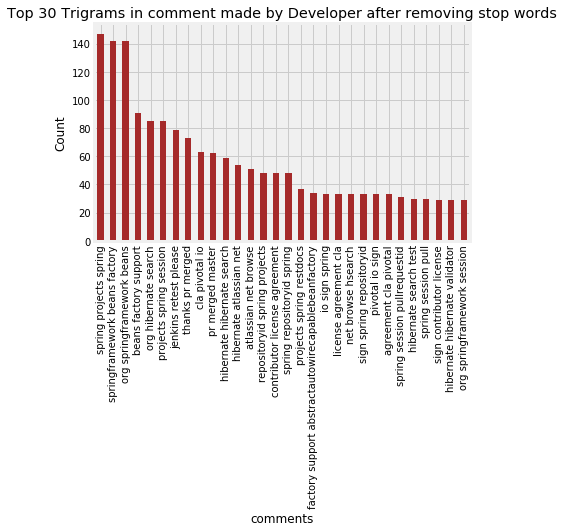

<Figure size 2160x432 with 0 Axes>

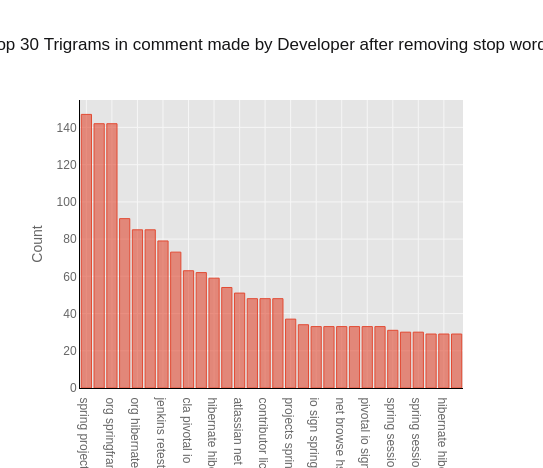

In [10]:
# Trigrams frequency distribution after removing stop words 
def get_top_n_words(corpus, n=None):
    vec= CountVectorizer(ngram_range=(3,3),stop_words=stopword__).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

common_words= get_top_n_words(data['comment'],30)
df_1= pd.DataFrame(common_words, columns=['comment','count'])
df_1.groupby('comment').sum()['count'].sort_values(ascending=False).plot(kind='bar', color="brown"), 
plt.ylabel('Count')
plt.xlabel('comments')
plt.title('Top 30 Trigrams in comment made by Developer after removing stop words')
plt.figure(figsize = (30,6))
plt.show()



df_1.groupby('comment').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', 
                                                           linecolor='black',
                                                           title='Top 30 Trigrams in comment made by Developer after removing stop words')


From the Trigrams it can be seen the most common problem that appear in the comment is in regards to the spring project. 

In [11]:
# comment word count distrubution 
data['word_count']= data['comment'].apply(lambda x: len(str(x).split()))
comment_lengths= list(data['word_count'])
print("Number of descriptions:", len(comment_lengths),
     "\nAverage word count", round(np.average(comment_lengths),0),
     "\nMinimum word count", min(comment_lengths),
     "\nMaximum word count", max(comment_lengths))

Number of descriptions: 4001 
Average word count 31.0 
Minimum word count 1 
Maximum word count 892


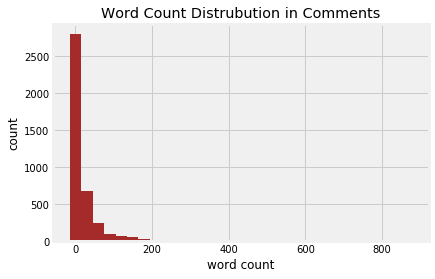

<Figure size 2160x432 with 0 Axes>

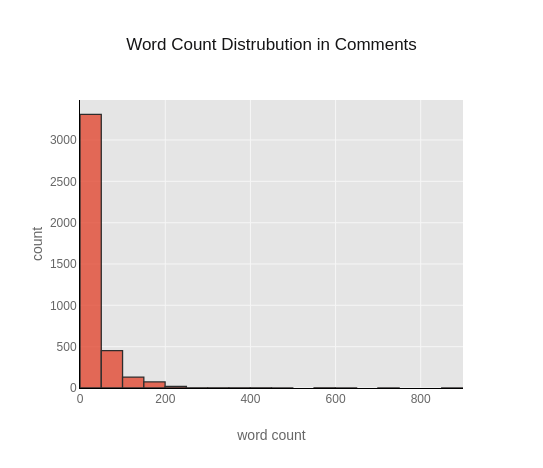

In [12]:
data['word_count'].plot.hist(bins=30, align='left',color="brown"), 
plt.ylabel('count')
plt.xlabel('word count')
plt.title('Word Count Distrubution in Comments')
plt.figure(figsize = (30,6))
plt.show()

data['word_count'].iplot(kind='hist', bins=20, linecolor='black', xTitle='word count', yTitle='count',
                        title="Word Count Distrubution in Comments")

This indicate that many develop give less comments.

In [13]:
# declaring variables
replace_by_space= re.compile('[/(){}\[\]\|@,;*]')
replace_by_space_symbol= re.compile('[^0-9a-z #+_]')
replace_by_space_punc = re.compile(r'\n [^\w\s]')

# function to clean data
def clean_text(text):
    text= text.lower() #lowercase text 
    text= replace_by_space.sub(' ', text)
    text= replace_by_space_symbol.sub(' ',text)
    text= replace_by_space_punc.sub(' ',text)
    text= ' '.join(word for word in text.split() if word not in stopword__)# removing stop words
    return text

data['comment']= data['comment'].apply(clean_text)
data.head()

,comment,comment_date,is_merged,merged_at,request_changes,word_count
0,chef maintainers,2017-05-29 10:54:23,0.0,NaN,0,1
1,omnibus builds already pain merging fix,2017-05-25 20:34:45,1.0,2017-05-25 20:34:27,0,11
2,chef client core reviewage lets think hard bre...,2017-05-25 17:21:56,1.0,2017-05-25 19:05:10,0,26
3,blows 14 04 allow downgrades supported need fi...,2017-05-25 19:15:14,0.0,NaN,1,33
4,know lamont granquist thommay going unhappy on...,2017-05-23 22:58:13,1.0,2017-05-24 04:40:42,0,36


(-0.5, 1199.5, 499.5, -0.5)

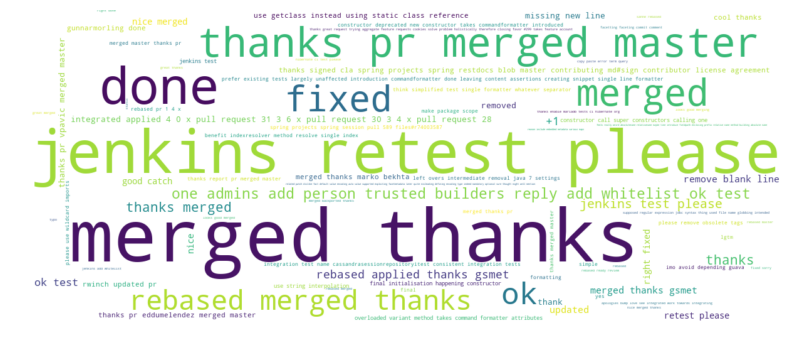

In [14]:
# Visualizing comments
fdist= FreqDist(data['comment'])
wc = WordCloud(width=1200, height=500, max_words=150, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")


In [15]:
# converting merged_at and commment_date columns to date and time and finding the Resolved time in mins
data['merged_at']= pd.to_datetime(data['merged_at'], errors='coerce')
data['comment_date']= pd.to_datetime(data['comment_date'], errors='coerce')
data['ResolvedTime']= (data.merged_at - data.comment_date).apply(lambda x: x.total_seconds()/60).abs().round(2)
data.head()

,comment,comment_date,is_merged,merged_at,request_changes,word_count,ResolvedTime
0,chef maintainers,2017-05-29 10:54:23,0.0,NaT,0,1,NaN
1,omnibus builds already pain merging fix,2017-05-25 20:34:45,1.0,2017-05-25 20:34:27,0,11,0.30
2,chef client core reviewage lets think hard bre...,2017-05-25 17:21:56,1.0,2017-05-25 19:05:10,0,26,103.23
3,blows 14 04 allow downgrades supported need fi...,2017-05-25 19:15:14,0.0,NaT,1,33,NaN
4,know lamont granquist thommay going unhappy on...,2017-05-23 22:58:13,1.0,2017-05-24 04:40:42,0,36,342.48


In [16]:
# Removing NaN in merged data and computing the stat. 
Resolved_noNaN= data[data.ResolvedTime.notnull()]
print("The Average time spent on resolving after a change was Request is:",str(round(np.average(Resolved_noNaN.ResolvedTime),2))+"m",
      "\nMedian value of time spent on resolving after a change was Request is ",str(round(np.median(Resolved_noNaN.ResolvedTime),2))+"m",
      "\nThe maximum time spent on resolving a change request is",str(round(max(Resolved_noNaN.ResolvedTime),2))+"m",
      "\nThe minimum time spent on resolving a change request is",str(round(min(Resolved_noNaN.ResolvedTime),2))+"m")

The Average time spent on resolving after a change was Request is: 4641.91m 
Median value of time spent on resolving after a change was Request is  327.35m 
The maximum time spent on resolving a change request is 207549.43m 
The minimum time spent on resolving a change request is 0.03m


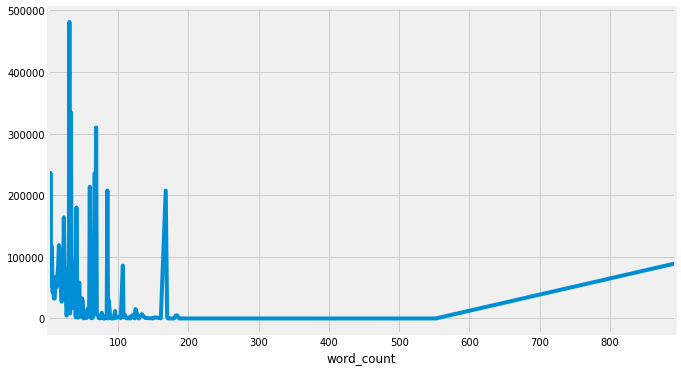

In [17]:
#plot of word count against ResolvedTime, Does not Include NaN
plt.figure(figsize = (10,6))
Resolved_noNaN.groupby('word_count')['ResolvedTime'].sum().plot()

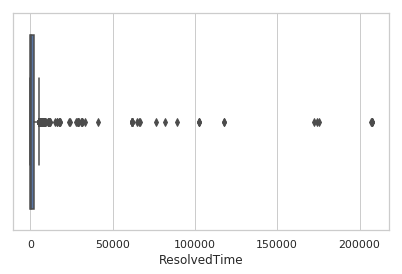

In [18]:
# Box plot of Resolved time, does not include NaN 
sns.set(style="whitegrid")
sns.boxplot(x= Resolved_noNaN['ResolvedTime'])

In [19]:
# filling all NaN with 0 and performing basic stats. 
data.fillna(0, inplace=True)
print("The Average time spent on resolving after a change was Request is:",str(np.average(data['ResolvedTime']))+"m",
"\nMedian value of time spent on resolving after a change was Request is  ",str(np.median(data['ResolvedTime']))+"m",
"\nThe maximum time spent on resolving a change request is",str(max(data['ResolvedTime']))+"m",
"\nThe minimum time spent on resolving a change request is",str(min(data['ResolvedTime']))+"m")

The Average time spent on resolving after a change was Request is: 1344.6558260434892m 
Median value of time spent on resolving after a change was Request is   0.0m 
The maximum time spent on resolving a change request is 207549.43m 
The minimum time spent on resolving a change request is 0.0m


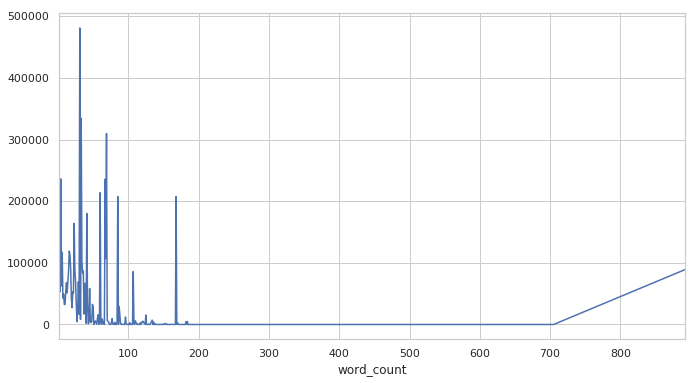

In [20]:
#plot of word count against ResolvedTime. All NaN are filled to 0.
plt.figure(figsize = (10,6))
data.groupby('word_count')['ResolvedTime'].sum().plot()

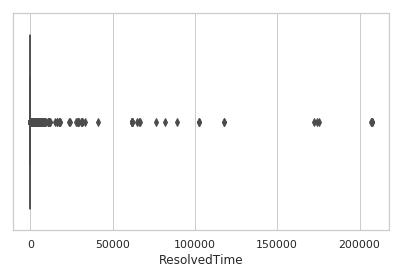

In [21]:
# Box plot of Resolved time. All NaN are filled to 0.
sns.set(style="whitegrid")
sns.boxplot(x= data['ResolvedTime'])

# Classifying the comment into clusters using K-means 

In [22]:
# components for feature reduction
n_components= 5
# number of clusters 
n_clusters=4

#convert words into TFDIF metrics 
tfidf= TfidfVectorizer(stop_words=stopword__,
                      max_features = 5000)
X_test= tfidf.fit_transform(data['comment'])
X_norm= normalize(X_test)
X_array= X_norm.toarray() 
print(pd.DataFrame(X_test).head())
print(pd.DataFrame(X_array, columns= tfidf.get_feature_names()).head())

                                                   0
0    (0, 930)\t0.6546238962160916\n  (0, 2804)\t0...
1    (0, 833)\t0.49300028199626017\n  (0, 527)\t0...
2    (0, 930)\t0.30349891806430623\n  (0, 969)\t0...
3    (0, 53)\t0.3601893084960811\n  (0, 517)\t0.2...
4    (0, 1973)\t0.21945416808831233\n  (0, 2637)\...
    00  0000   01   02   03   06   08  0_92  0xb   10  ...  yml  yoann  \
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0    0.0   
1  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0    0.0   
2  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0    0.0   
3  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0    0.0   
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.0    0.0   

   yodamad  yrodiere  yup  zaxxer  zbbfufu  zero  zip  zuul  
0      0.0       0.0  0.0     0.0      0.0   0.0  0.0   0.0  
1      0.0       0.0  0.0     0.0      0.0   0.0  0.0   0.0  
2      0.0       0.0  0.0     0.0      0.0   0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.



In [23]:
# reduce dimension 
svd= TruncatedSVD(n_components=n_components, random_state=0)
X_2d= svd.fit_transform(X_test)

In [24]:
# fit k-mean clustering 
kmeans= KMeans(n_clusters= n_clusters, random_state= 0)
#predict cluster for each comment 
X_clustered= kmeans.fit_predict(X_2d) 

In [25]:
# display by groups 
df_plot= pd.DataFrame(list(X_2d),list(X_clustered))
df_plot= df_plot.reset_index()
df_plot.rename(columns={'index': 'Cluster'}, inplace= True)
df_plot['Cluster']= df_plot['Cluster'].astype(int)

print(df_plot.head())
print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4
0        1  0.000100  0.000067  0.000479  0.002012 -0.000411
1        1  0.004007  0.003110  0.013434  0.040835 -0.002111
2        1  0.003751  0.002096  0.010947  0.044280 -0.006155
3        1  0.002966  0.003803  0.013874  0.054815 -0.011227
4        1  0.005890  0.138820  0.012906  0.044875  0.000101
         Cluster
Cluster         
0             99
1           3544
2            296
3             62


Text(0.01, 0.5, 'Component n')

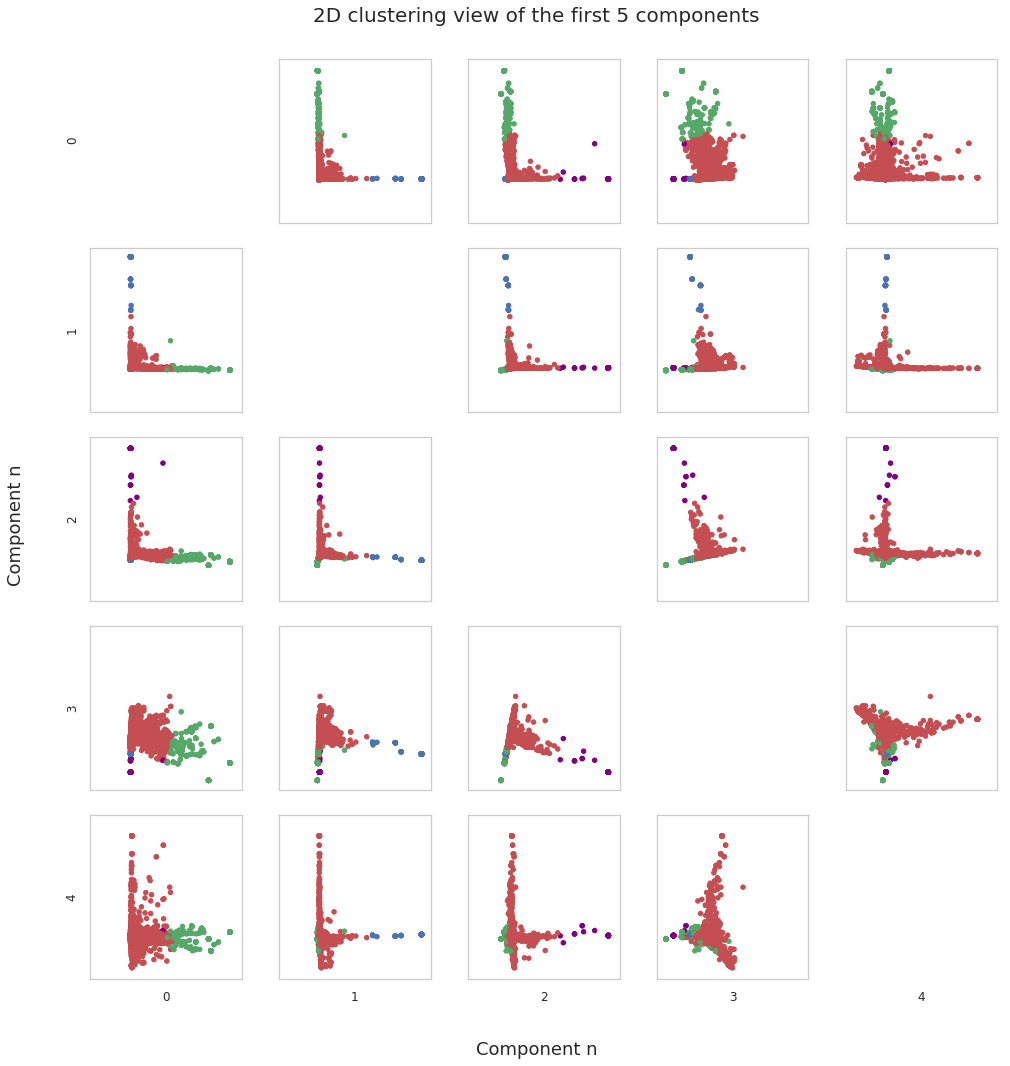

In [26]:
# make a column for color by clusters
col= df_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n= 5

# visualize the clusters by first n dimensions (reduced)
fig, ax= plt.subplots(n, n, sharex= True, sharey= True, figsize= (15,15))
fig.tight_layout(rect= [0.05, 0.05, 0.95, 0.95])

# plot it
k= 0
for i in range(0,n):
    for j in range(0,n):
        if i!= j:
            df_plot.plot(kind = 'scatter', x= j, y= i, c= col, ax= ax[i][j], fontsize= 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

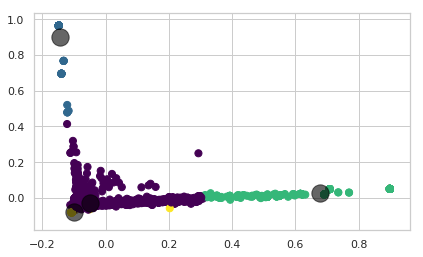

In [27]:
X_pca= PCA(n_components= n_clusters) 
Y_pca= X_pca.fit_transform(X_array)
kmeans= KMeans(n_clusters= n_clusters, max_iter= 600, algorithm= 'auto')
fit_= kmeans.fit(Y_pca)
Y_clustered= kmeans.predict(Y_pca)

plt.scatter(Y_pca[:,0],Y_pca[:,1],c=Y_clustered, s=50, cmap='viridis')
centers2 = fit_.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

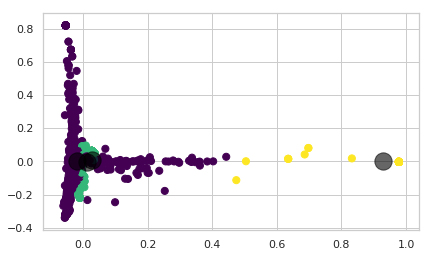

In [28]:
plt.scatter(Y_pca[:,2],Y_pca[:,3],c=Y_clustered, s=50, cmap='viridis')
centers2 = fit_.cluster_centers_
plt.scatter(centers2[:, 2], centers2[:, 3],c='black', s=300, alpha=0.6);

In [29]:
df2_plot= pd.DataFrame(list(Y_pca),list(Y_clustered))
df2_plot= df2_plot.reset_index()
df2_plot.rename(columns={'index': 'Cluster'}, inplace= True)
df2_plot['Cluster']= df2_plot['Cluster'].astype(int)

print(df2_plot.head())
print(df2_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3
0        0 -0.066771 -0.020729 -0.010462  0.004046
1        0 -0.072487 -0.026734 -0.014045  0.001260
2        0 -0.074062 -0.028921 -0.018661 -0.001181
3        0 -0.076984 -0.029437 -0.019938 -0.005674
4        0 -0.086244  0.104349 -0.012033  0.006066
         Cluster
Cluster         
0           3548
1             99
2            292
3             62


Text(0.01, 0.5, 'Component n')

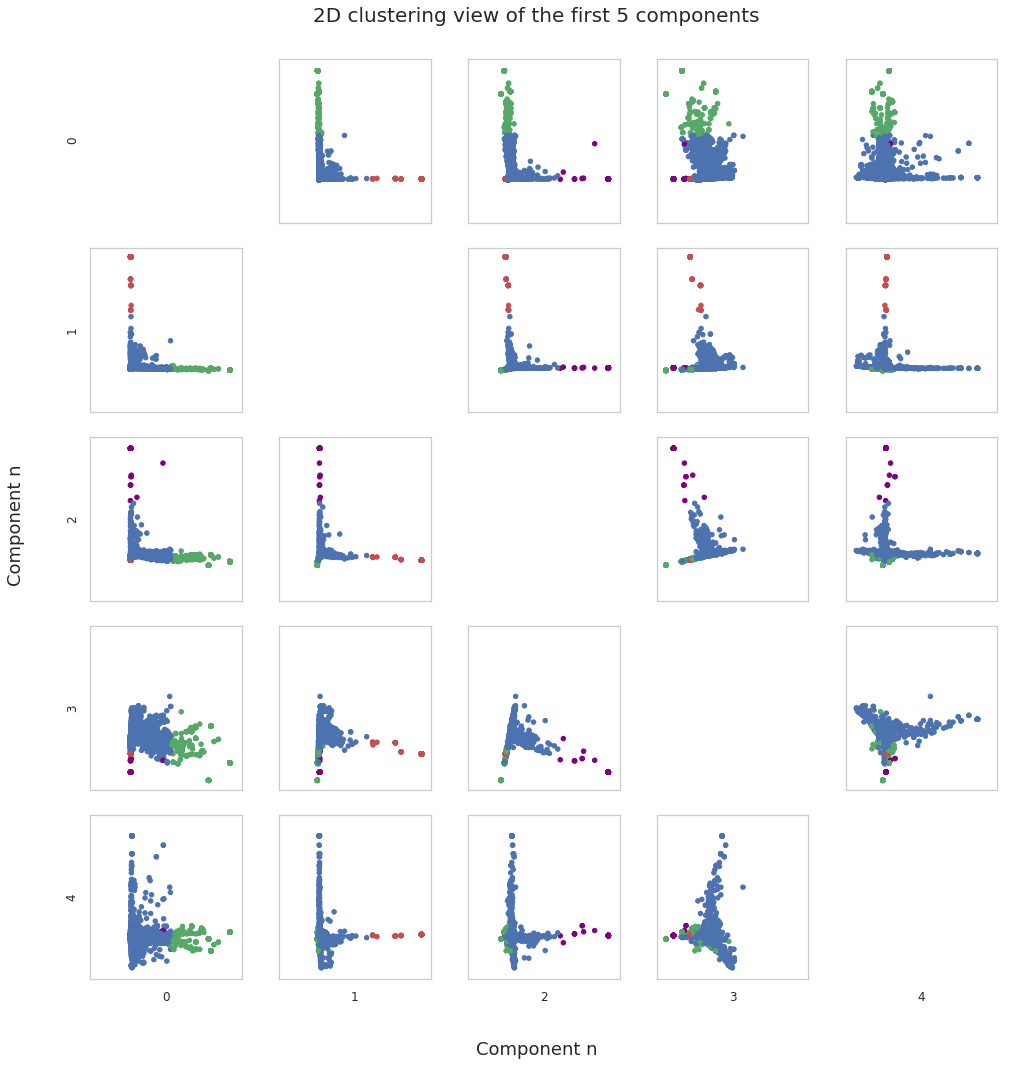

In [30]:
# make a column for color by clusters
col= df2_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold'})

# variable for first n dimensions we want to plot
n= 5

# visualize the clusters by first n dimensions (reduced)
fig, ax= plt.subplots(n, n, sharex= True, sharey= True, figsize= (15,15))
fig.tight_layout(rect= [0.05, 0.05, 0.95, 0.95])

# plot it
k= 0
for i in range(0,n):
    for j in range(0,n):
        if i!= j:
            df_plot.plot(kind = 'scatter', x= j, y= i, c= col, ax= ax[i][j], fontsize= 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

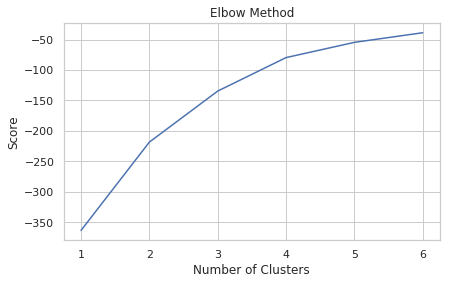

In [31]:
# optimal cluster 
number_clusters= range(1,7)
kmeans= [KMeans(n_clusters= i, max_iter= 600) for i in number_clusters]
kmeans

score= [kmeans[i].fit(Y_pca).score(Y_pca) for i in range(len(kmeans))]
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

From the chart above, it shows that 4 cluster is okay. 

In [32]:
#geting the top features from each cluster. 
def get_top_features(X_array, Y_clustered, n_features):
    labels= np.unique(Y_clustered)
    dfs_= [] 
    for label in labels:
        id_temp= np.where(Y_clustered==label) #indicies for a each cluster 
        x_mean= np.mean(X_array[id_temp], axis=0) # return average score past cluster 
        sorted_mean=np.argsort(x_mean)[::-1][:n_features] # indicies up to n number of features 
        features= tfidf.get_feature_names()
        best_features= [(features[i], x_mean[i]) for i in sorted_mean]
        df= pd.DataFrame(best_features, columns=['features','score'])
        dfs_.append(df)
    return dfs_

df_2= get_top_features(X_array,Y_clustered, 20)

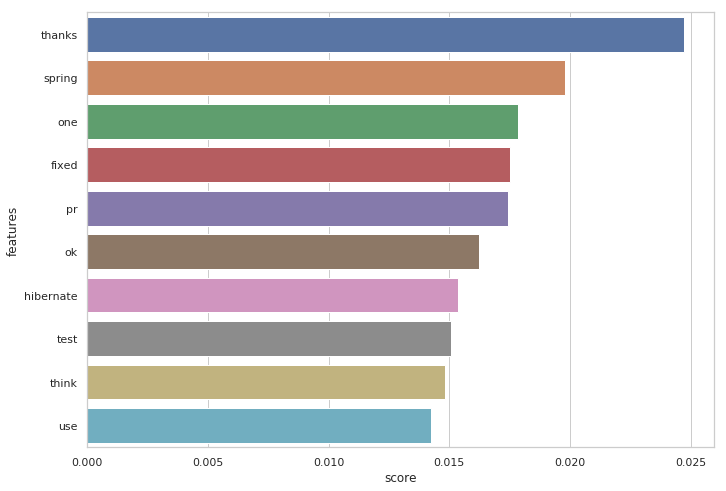

In [33]:
#plotting graphs for each top feature in a cluster
plt.figure(figsize=(10,8))
sns.barplot(x='score', y='features', orient = 'h',data=df_2[0][:10])

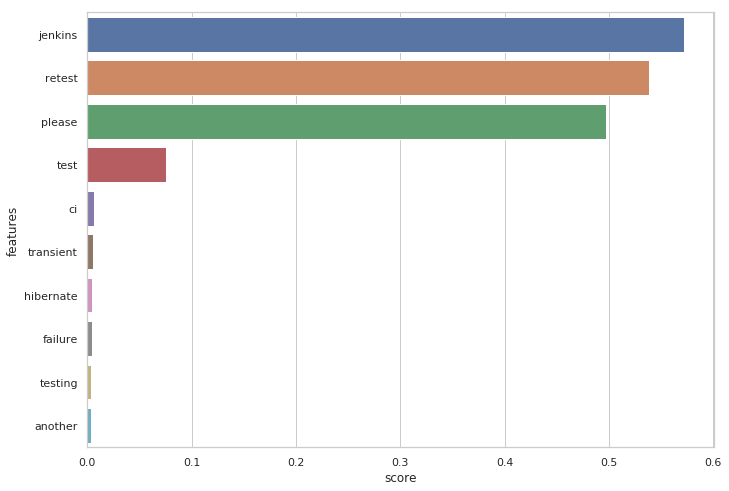

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='score', y='features',orient = 'h', data=df_2[1][:10])

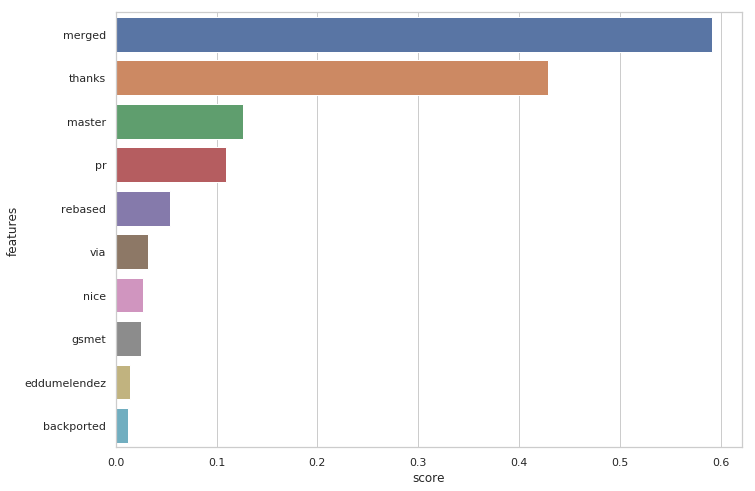

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x='score', y='features', orient = 'h',data=df_2[2][:10])

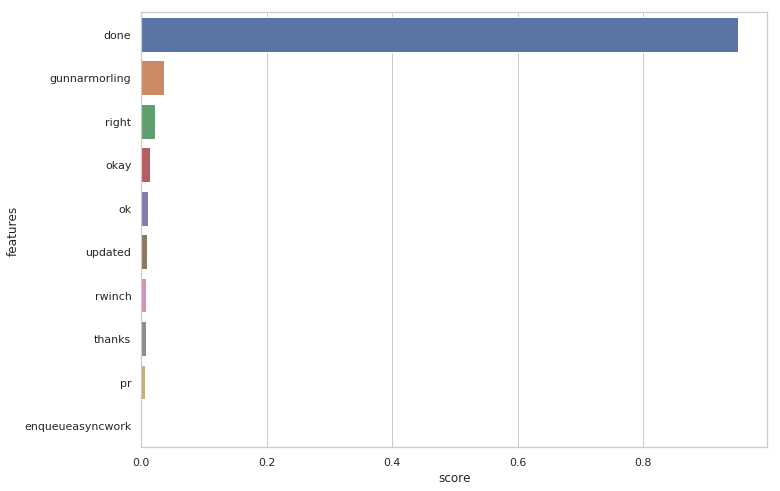

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='score', y='features', orient = 'h', data=df_2[3][:10])

# Classifying the comment into clusters using Gaussian Mixture Method

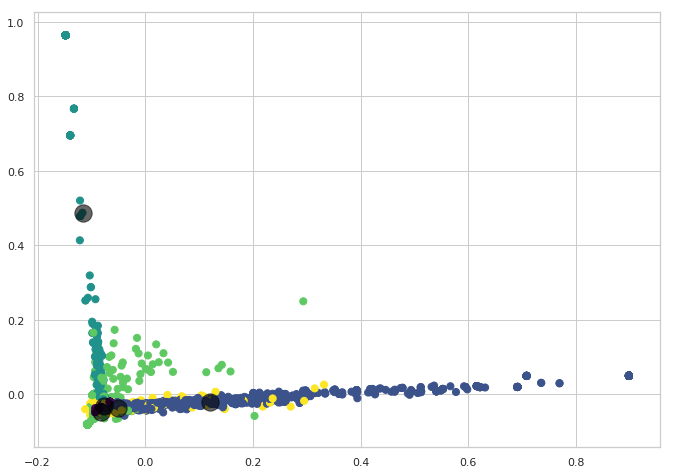

In [37]:
n_clusters= 4
n_components= 5
X_pca= PCA(n_components= n_clusters) 
Y_pca= X_pca.fit_transform(X_array)
GMM= GaussianMixture(n_components= n_components, covariance_type= 'full').fit(Y_pca)
fit_= GMM.fit(Y_pca)
Y_clustered= GMM.predict(Y_pca)
probs= GMM.predict_proba(Y_pca)

centers= np.zeros((n_components,n_clusters))
for i in range(n_components):
    density= mvn(cov= GMM.covariances_[i], mean= GMM.means_[i]).logpdf(Y_pca)
    centers[i, :]= Y_pca[np.argmax(density)]

plt.figure(figsize= (10,8))
plt.scatter(Y_pca[:,0],Y_pca[:,1], c= Y_clustered, s= 50, cmap= 'viridis')
plt.scatter(centers[:,0],centers[:,1], c='black',s= 300,alpha= 0.6)

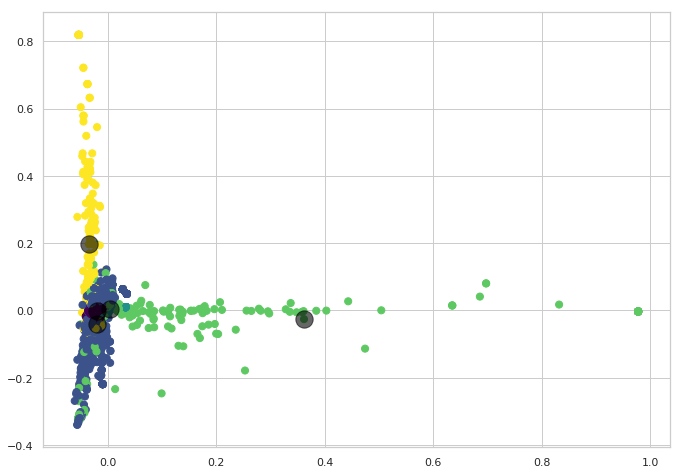

In [38]:
plt.figure(figsize= (10,8))
plt.scatter(Y_pca[:,2],Y_pca[:,3], c= Y_clustered, s= 50, cmap= 'viridis')
plt.scatter(centers[:,2],centers[:,3], c='black',s= 300,alpha= 0.6)
